In [27]:
import tensorflow as tf
from tensorflow import keras

In [28]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

x_train = x_train / 255.
x_test = x_test / 255.

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [29]:
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

print('Sample Data')
print(x_train[0])
print(y_train[0])

(50000, 32, 32, 3) (10000, 32, 32, 3)
(50000, 10) (10000, 10)
Sample Data
[[[0.23137255 0.24313725 0.24705882]
  [0.16862745 0.18039216 0.17647059]
  [0.19607843 0.18823529 0.16862745]
  ...
  [0.61960784 0.51764706 0.42352941]
  [0.59607843 0.49019608 0.4       ]
  [0.58039216 0.48627451 0.40392157]]

 [[0.0627451  0.07843137 0.07843137]
  [0.         0.         0.        ]
  [0.07058824 0.03137255 0.        ]
  ...
  [0.48235294 0.34509804 0.21568627]
  [0.46666667 0.3254902  0.19607843]
  [0.47843137 0.34117647 0.22352941]]

 [[0.09803922 0.09411765 0.08235294]
  [0.0627451  0.02745098 0.        ]
  [0.19215686 0.10588235 0.03137255]
  ...
  [0.4627451  0.32941176 0.19607843]
  [0.47058824 0.32941176 0.19607843]
  [0.42745098 0.28627451 0.16470588]]

 ...

 [[0.81568627 0.66666667 0.37647059]
  [0.78823529 0.6        0.13333333]
  [0.77647059 0.63137255 0.10196078]
  ...
  [0.62745098 0.52156863 0.2745098 ]
  [0.21960784 0.12156863 0.02745098]
  [0.20784314 0.13333333 0.07843137]]



In [30]:
from keras import layers

In [42]:
input = layers.Input(shape=(32, 32, 3))

x = layers.Conv2D(32, (3, 3), padding='same', activation='relu', kernel_initializer='he_uniform')(input)
x = layers.Conv2D(32, (3, 3), padding='same', activation='relu', kernel_initializer='he_uniform')(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D((3, 3), (2, 2), padding='same')(x)
x = layers.Dropout(0.3)(x)

x = layers.Conv2D(64, (3, 3), padding='same', activation='relu', kernel_initializer='he_uniform')(x)
x = layers.Conv2D(64, (3, 3), padding='same', activation='relu', kernel_initializer='he_uniform')(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D((3, 3), (2, 2), padding='same')(x)
x = layers.Dropout(0.3)(x)

x = layers.Conv2D(64, (3, 3), padding='same', activation='relu', kernel_initializer='he_uniform')(x)
x = layers.Conv2D(64, (3, 3), padding='same', activation='relu', kernel_initializer='he_uniform')(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D((3, 3), (2, 2), padding='same')(x)
x = layers.Dropout(0.3)(x)

x = layers.Conv2D(64, (3, 3), padding='same', activation='relu', kernel_initializer='he_uniform')(x)
x = layers.Conv2D(64, (3, 3), padding='same', activation='relu', kernel_initializer='he_uniform')(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D((3, 3), (2, 2), padding='same')(x)
x = layers.Dropout(0.3)(x)

x = layers.Conv2D(128, (3, 3), padding='same', activation='relu', kernel_initializer='he_uniform')(x)
x = layers.Conv2D(128, (3, 3), padding='same', activation='relu', kernel_initializer='he_uniform')(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D((3, 3), (2, 2), padding='same')(x)
x = layers.Dropout(0.3)(x)

x = layers.Flatten()(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.3)(x)

output = layers.Dense(10, activation='softmax')(x)

In [43]:
model = keras.Model(input, output)
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_41 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_42 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_18 (Ba  (None, 32, 32, 32)        128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_25 (MaxPooli  (None, 16, 16, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_30 (Dropout)        (None, 16, 16, 32)        0   

In [44]:
model.compile(optimizer=keras.optimizers.Adam(0.01), loss='categorical_crossentropy', metrics=['acc'])

In [45]:
history = model.fit(x_train, y_train, batch_size=512, epochs=150, validation_data=(x_test, y_test))

Epoch 1/150
98/98 [==============================] - 14s 74ms/step - loss: 2.0007 - acc: 0.2613 - val_loss: 3.8463 - val_acc: 0.2300
Epoch 2/150
98/98 [==============================] - 6s 63ms/step - loss: 1.5795 - acc: 0.3990 - val_loss: 2.8386 - val_acc: 0.3063
Epoch 3/150
98/98 [==============================] - 6s 62ms/step - loss: 1.3542 - acc: 0.4970 - val_loss: 2.0276 - val_acc: 0.3710
Epoch 4/150
98/98 [==============================] - 7s 67ms/step - loss: 1.1799 - acc: 0.5737 - val_loss: 1.8429 - val_acc: 0.4719
Epoch 5/150
98/98 [==============================] - 6s 62ms/step - loss: 1.0346 - acc: 0.6320 - val_loss: 1.2174 - val_acc: 0.6264
Epoch 6/150
98/98 [==============================] - 7s 71ms/step - loss: 0.9362 - acc: 0.6699 - val_loss: 0.9983 - val_acc: 0.6737
Epoch 7/150
98/98 [==============================] - 6s 61ms/step - loss: 0.8642 - acc: 0.6977 - val_loss: 0.8692 - val_acc: 0.7097
Epoch 8/150
98/98 [==============================] - 6s 64ms/step - loss: 0

In [46]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Loss: {test_loss:.5f}, Acc: {test_acc * 100:.2f}%')

313/313 [==============================] - 1s 3ms/step - loss: 0.5433 - acc: 0.8624
Loss: 0.54333, Acc: 86.24%


In [47]:
import matplotlib.pyplot as plt

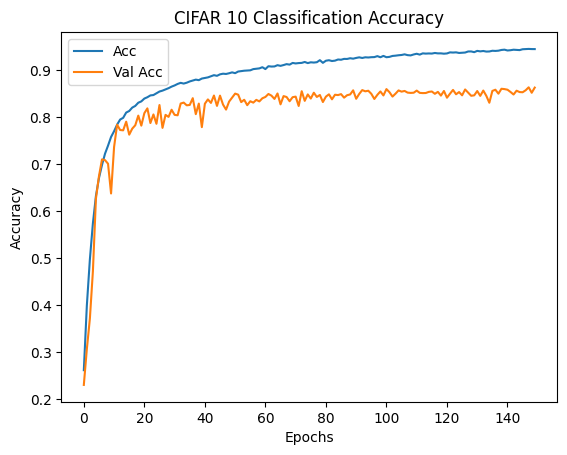

In [48]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Acc', 'Val Acc'])
plt.title(f'CIFAR 10 Classification Accuracy')

plt.show()

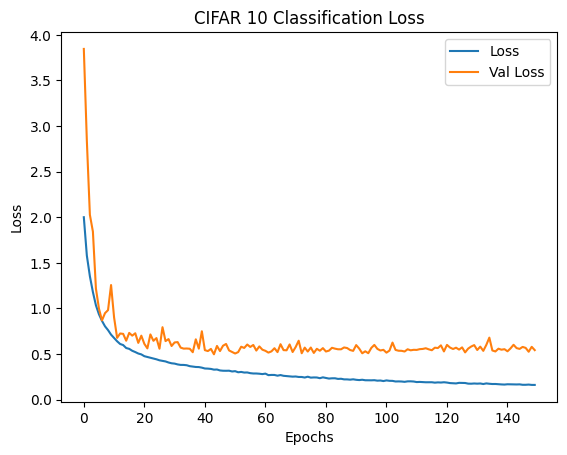

In [49]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Loss', 'Val Loss'])
plt.title(f'CIFAR 10 Classification Loss')

plt.show()